# [Projet 3: Développez un moteur de recommandations de films](https://openclassrooms.com/projects/developpez-un-moteur-de-recommandations-de-films)

Link to raw data: [here](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Moteur+de+recommandation+de+films/imdb-5000-movie-dataset.zip).

In [31]:
import os
HOME = os.path.expanduser('~/')
HOST = os.uname()[1]
if HOST == 'Arthurs-MacBook-Pro.local':
    os.chdir(HOME+'/Documents/GitHub/OCDataSciencePath/Project3/')    # @home
elif HOST == 'Sirius.local':
    os.chdir(HOME+'Perso/GitHub/OCDataSciencePath/Project3/')         # @L2
else:
    raise ValueError('unknown host: {}'.format(HOST))
    
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline


In [10]:
if HOST == 'Arthurs-MacBook-Pro.local':
    pathToData = HOME+'xxx'    # @home
elif HOST == 'Sirius.local':
    pathToData = HOME+'Downloads/movie_metadata_CLEAN.csv'         # @L2
else:
    raise ValueError('unknown host: {}'.format(HOST))
    
df = pd.read_csv(pathToData)

### Exploratory Data Analysis

In [36]:
X = df.filter(like='genres',axis=1).values
X.shape

(4910, 26)

In [37]:
print(X.mean(axis=0))
print(X.std(axis=0))
Xs = StandardScaler().fit_transform(X)

[  2.26680244e-01   1.80855397e-01   4.88798371e-02   5.92668024e-02
   3.76171079e-01   1.76782077e-01   2.32179226e-02   5.15682281e-01
   1.08553971e-01   1.18737271e-01   1.22199593e-03   2.03665988e-04
   4.11405295e-02   1.09775967e-01   6.57841141e-02   2.66802444e-02
   9.87780041e-02   6.10997963e-04   4.07331976e-04   2.20773931e-01
   1.20977597e-01   1.01832994e-03   3.60488798e-02   2.77800407e-01
   4.25661914e-02   1.91446029e-02]
[ 0.41868402  0.38489833  0.21561679  0.23612338  0.48442378  0.38148417
  0.15059499  0.49975401  0.31107878  0.32347911  0.03493569  0.01426971
  0.19861517  0.31261031  0.24790435  0.16114717  0.29836372  0.02471082
  0.02017836  0.41476837  0.32610124  0.03189503  0.1864118   0.44791443
  0.20187697  0.13703316]


/Users/arthur/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [38]:
pca = PCA(n_components=3)
Xpc = pca.fit_transform(Xs)

In [39]:
Xpc

array([[  1.68082961e+00,  -2.94262807e+00,  -3.84199038e-01],
       [  1.47970527e+00,  -1.94175160e+00,  -3.51228332e-01],
       [ -1.04545914e-01,  -2.25185799e+00,  -2.03108991e-01],
       ..., 
       [ -1.59280374e+00,  -7.60663940e-01,   7.40136041e-02],
       [  9.39831406e-02,   1.76061101e+00,   3.79876876e-01],
       [ -2.08979261e-01,   5.60635559e-01,  -2.22355724e-03]])

(-2, 2)

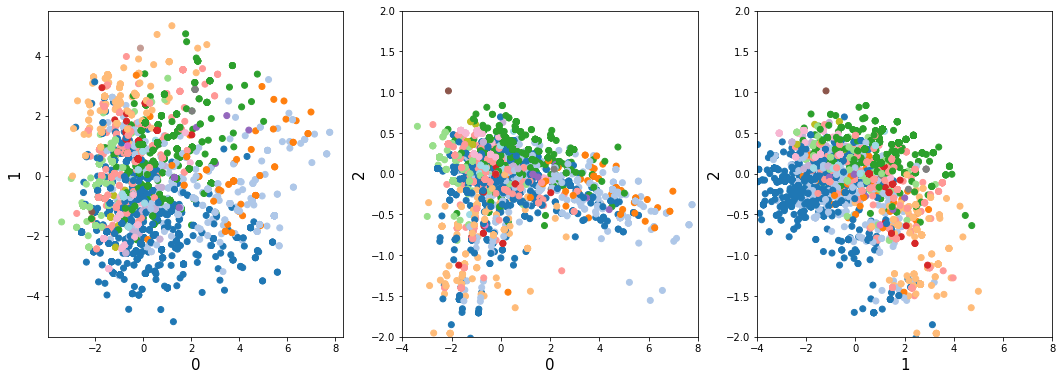

In [51]:
f = plt.figure(figsize=(18,6))

ax = f.add_subplot(1,3,1)
ax.scatter(Xpc[:,0],Xpc[:,1],color=cm.tab20(X.argmax(axis=1)))
ax.set_xlabel(0, fontsize = 15)
ax.set_ylabel(1, fontsize = 15)

ax = f.add_subplot(1,3,2)
ax.scatter(Xpc[:,0],Xpc[:,2],color=cm.tab20(X.argmax(axis=1)))
ax.set_xlabel(0, fontsize = 15)
ax.set_ylabel(2, fontsize = 15)
ax.set_xlim(-4,8)
ax.set_ylim(-2,2)

ax = f.add_subplot(1,3,3)
ax.scatter(Xpc[:,1],Xpc[:,2],color=cm.tab20(X.argmax(axis=1)))
ax.set_xlabel(1, fontsize = 15)
ax.set_ylabel(2, fontsize = 15)
ax.set_xlim(-4,8)
ax.set_ylim(-2,2)
